In [53]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
# loading data 
sheets = pd.read_excel("C:/Users/91628/Dropbox/PC/Desktop/Sales_db/Regional Sales Dataset.xlsx", sheet_name = None)

In [55]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2021-01-01                  126    Wholesale   
 1      SO - 0003378 2021-01-01                   96  Distributor   
 2      SO - 0005126 2021-01-01                    8    Wholesale   
 3      SO - 0005614 2021-01-01                   42       Export   
 4      SO - 0005781 2021-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2025-02-28                   74    Wholesale   
 64100  SO - 0007706 2025-02-28                   51       Export   
 64101  SO - 0007718 2025-02-28                  136  Distributor   
 64102  SO - 0008084 2025-02-28                  158  Distributor   
 64103  SO - 0008654 2025-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [56]:
## Assinged dataframes to each sheet
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_state_reg = sheets['State_Regions']
df_products = sheets['Products']
df_budgets = sheets['2024 Budgets']

In [57]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [58]:
df_sales.head(5)

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  
0               6      2499.1     14994.6         1824.343  
1              11      2351.7     25868.7         1269.918  
2               6       978.2      5869.2          684.740  
3               7      2338.3     16368.1         1028.852  
4               8      2291.4     18331.2         1260.270

In [59]:
df_sales.shape

(64104, 12)

In [60]:
df_state_reg.head(5)

State Code       State Region
0         AL     Alabama  South
1         AR    Arkansas  South
2         AZ     Arizona   West
3         CA  California   West
4         CO    Colorado   West

In [61]:
## null values check
df_sales.isna().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [62]:
## Data Cleaning and Wrangling
## joining 'df_customers' with 'df_sales'
df_new = df_sales.merge(
     df_customers,
         how = 'left',
         left_on = 'Customer Name Index',
         right_on = 'Customer Index'        
)

In [63]:
# new dataframe is df
df_new.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  Customer Index  \
0               6      2499.1     14994.6         1824.343             126   
1              11      2351.7     25868.7         1269.918              96   
2               6       978.2      5869.2          684.740               8   
3               7      2338.3     16368.1         1028.852              42   
4               8      2291.4     18331.2         1260.270              73   

     Customer Names  
0     Rhynoodle Ltd  
1    Thoughtmix Ltd  
2   Amerisourc Corp  
3  Colgate-Pa Group  
4     Deseret Group

In [64]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [65]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [66]:
## joining 'df_products' with 'df'
df = df_new.merge(
     df_products,
         how = 'left',
         left_on = 'Product Description Index',
         right_on = 'Index'        
)

In [67]:
df_new.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  Customer Index  \
0               6      2499.1     14994.6         1824.343             126   
1              11      2351.7     25868.7         1269.918              96   
2               6       978.2      5869.2          684.740               8   
3               7      2338.3     16368.1         1028.852              42   
4               8      2291.4     18331.2         1260.270              73   

     Customer Names  
0     Rhynoodle Ltd  
1    Thoughtmix Ltd  
2   Amerisourc Corp  
3  Colgate-Pa Group  
4     Deseret Group

In [68]:
df_products.head()

Index Product Name
0      1    Product 1
1      2    Product 2
2      3    Product 3
3      4    Product 4
4      5    Product 5

In [69]:

df_new.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  Customer Index  \
0               6      2499.1     14994.6         1824.343             126   
1              11      2351.7     25868.7         1269.918              96   
2               6       978.2      5869.2          684.740               8   
3               7      2338.3     16368.1         1028.852              42   
4               8      2291.4     18331.2         1260.270              73   

     Customer Names  
0     Rhynoodle Ltd  
1    Thoughtmix Ltd  
2   Amerisourc Corp  
3  Colgate-Pa Group  
4     Deseret Group

In [70]:
## joining 'df_products' with 'df_new'
df_sale_customers_products = df_new.merge(
     df_products,
         how = 'left',
         left_on = 'Product Description Index',
         right_on = 'Index'        
)

In [71]:
df_sale_customers_products.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  Customer Index  \
0               6      2499.1     14994.6         1824.343             126   
1              11      2351.7     25868.7         1269.918              96   
2               6       978.2      5869.2          684.740               8   
3               7      2338.3     16368.1         1028.852              42   
4               8      2291.4     18331.2         1260.270              73   

     Customer Names  Index Product Name  
0     Rhynoodle Ltd     27   Product 27  
1    Thoughtmix Ltd     20   Product 20  
2   Amerisourc Corp     26   Product 26  
3  Colgate-Pa Group      7    Product 7  
4     Deseret Group      8    Product 8

In [72]:
## joining 'df_regions' with 'df_sale_customers_products'
df_sale_customers_products_regions = df_sale_customers_products.merge(
     df_regions,
         how = 'left',
         left_on = 'Delivery Region Index',
         right_on = 'id'        
)

In [73]:
df_sale_customers_products_regions.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  ...  type  latitude  longitude area_code  \
0               6      2499.1  ...  City  32.08354  -81.09983       912   
1              11      2351.7  ...  City  39.61366  -86.10665       317   
2               6       978.2  ...  City  37.66243 -121.87468       925   
3               7      2338.3  ...  City  39.16533  -86.52639       812   
4               8      2291.4  ...  Town  41.77524  -72.52443       959   

   population households  median_income  land_area water_area  \
0      145674      52798          36466  268318796   13908113   
1       55586      20975          54176   72276415       1883   
2       79510      26020         124759   62489257     386195   
3       84067      30232          30019   60221613     475857   
4       58007      24141          63158   70972793     720300   

                      time_zone  
0              America/New York  
1  America/Indiana/Indianapolis  
2           America/Los Angeles  
3  America/Indiana/Indianapolis  
4              America/New York  

[5 rows x 31 columns]

In [74]:
## joining 'df_regions' with 'df_sale_customers_products'
df_sale_customers_products_regions_state_reg = df_sale_customers_products_regions.merge(
     df_state_reg,
         how = 'left',
         left_on = 'state_code',
         right_on = 'State Code'        
)

In [75]:
df_sale_customers_products_regions_state_reg.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  ...  area_code  population  households  \
0               6      2499.1  ...        912      145674       52798   
1              11      2351.7  ...        317       55586       20975   
2               6       978.2  ...        925       79510       26020   
3               7      2338.3  ...        812       84067       30232   
4               8      2291.4  ...        959       58007       24141   

  median_income  land_area water_area                     time_zone  \
0         36466  268318796   13908113              America/New York   
1         54176   72276415       1883  America/Indiana/Indianapolis   
2        124759   62489257     386195           America/Los Angeles   
3         30019   60221613     475857  America/Indiana/Indianapolis   
4         63158   70972793     720300              America/New York   

  State Code        State     Region  
0         GA      Georgia      South  
1         IN      Indiana    Midwest  
2         CA   California       West  
3         IN      Indiana    Midwest  
4         CT  Connecticut  Northeast  

[5 rows x 34 columns]

In [76]:
    df_sale_customers_products_regions_state_reg.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [77]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  30 non-null     object 
 1   2024 Budgets  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [78]:
df_budgets = df_budgets.rename(columns={'Product Name': 'Pd Name'})

In [79]:
print(df_budgets.columns)

Index(['Pd Name', '2024 Budgets'], dtype='object')


In [80]:
## joining 'df_budgets' with 'df_sale_customers_products'
df_sale_customers_products_regions_state_reg_budgets = df_sale_customers_products_regions_state_reg.merge(
     df_budgets,
         how = 'left',
         left_on = 'Product Name',
         right_on = 'Pd Name'        
)

In [81]:
df_sale_customers_products_regions_state_reg_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [82]:
# rename the dataframe 
df_SalesData = df_sale_customers_products_regions_state_reg_budgets


In [83]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [84]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [85]:
df_sales.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  
0               6      2499.1     14994.6         1824.343  
1              11      2351.7     25868.7         1269.918  
2               6       978.2      5869.2          684.740  
3               7      2338.3     16368.1         1028.852  
4               8      2291.4     18331.2         1260.270

In [86]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [87]:
df_new.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  Customer Index  \
0               6      2499.1     14994.6         1824.343             126   
1              11      2351.7     25868.7         1269.918              96   
2               6       978.2      5869.2          684.740               8   
3               7      2338.3     16368.1         1028.852              42   
4               8      2291.4     18331.2         1260.270              73   

     Customer Names  
0     Rhynoodle Ltd  
1    Thoughtmix Ltd  
2   Amerisourc Corp  
3  Colgate-Pa Group  
4     Deseret Group

In [30]:
## downloading the dataframe file 
df_SalesData.to_csv('SalesData.csv')

In [88]:
# Deleting the old name
del df_sale_customers_products_regions_state_reg_budgets


In [89]:
# Cleanup redundant columns
# Customer Index, Index, id, State Code

cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code', 'State']
df_SalesData = df_SalesData.drop(columns= cols_to_drop, errors= 'ignore')


In [90]:
df_SalesData.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Names', 'Product Name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'Region', 'Pd Name',
       '2024 Budgets'],
      dtype='object')

In [91]:
# convert all columns in lowercase 
df_SalesData.columns = df_SalesData.columns.str.lower()

In [92]:
df_SalesData.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       'pd name', '2024 budgets'], dtype=object)

In [93]:
df_SalesData.head()

ordernumber  orderdate  customer name index      channel currency code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  warehouse code  delivery region index  product description index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   order quantity  unit price  ...  area_code  population households  \
0               6      2499.1  ...        912      145674      52798   
1              11      2351.7  ...        317       55586      20975   
2               6       978.2  ...        925       79510      26020   
3               7      2338.3  ...        812       84067      30232   
4               8      2291.4  ...        959       58007      24141   

  median_income  land_area water_area                     time_zone  \
0         36466  268318796   13908113              America/New York   
1         54176   72276415       1883  America/Indiana/Indianapolis   
2        124759   62489257     386195           America/Los Angeles   
3         30019   60221613     475857  America/Indiana/Indianapolis   
4         63158   70972793     720300              America/New York   

      region     pd name  2024 budgets  
0      South  Product 27    964940.231  
1    Midwest  Product 20   2067108.120  
2       West  Product 26   5685138.270  
3    Midwest   Product 7    889737.555  
4  Northeast   Product 8   1085037.329  

[5 rows x 31 columns]

In [95]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ordernumber                64104 non-null  object        
 1   orderdate                  64104 non-null  datetime64[ns]
 2   customer name index        64104 non-null  int64         
 3   channel                    64104 non-null  object        
 4   currency code              64104 non-null  object        
 5   warehouse code             64104 non-null  object        
 6   delivery region index      64104 non-null  int64         
 7   product description index  64104 non-null  int64         
 8   order quantity             64104 non-null  int64         
 9   unit price                 64104 non-null  float64       
 10  line total                 64104 non-null  float64       
 11  total unit cost            64104 non-null  float64       
 12  cust

In [96]:
## keeping wanted coloumn 
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'channel',
    'customer names',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'state',
     'county',
     'region',
     'latitude',
     'longitude',
     '2024 budgets'
    
]

df_SalesData= df_SalesData[cols_to_keep]

In [97]:
df_SalesData.head()

ordernumber  orderdate      channel    customer names product name  \
0   SO - 000225 2021-01-01    Wholesale     Rhynoodle Ltd   Product 27   
1  SO - 0003378 2021-01-01  Distributor    Thoughtmix Ltd   Product 20   
2  SO - 0005126 2021-01-01    Wholesale   Amerisourc Corp   Product 26   
3  SO - 0005614 2021-01-01       Export  Colgate-Pa Group    Product 7   
4  SO - 0005781 2021-01-01    Wholesale     Deseret Group    Product 8   

   order quantity  unit price  line total  total unit cost state_code  \
0               6      2499.1     14994.6         1824.343         GA   
1              11      2351.7     25868.7         1269.918         IN   
2               6       978.2      5869.2          684.740         CA   
3               7      2338.3     16368.1         1028.852         IN   
4               8      2291.4     18331.2         1260.270         CT   

         state           county     region  latitude  longitude  2024 budgets  
0      Georgia   Chatham County      South  32.08354  -81.09983    964940.231  
1      Indiana   Johnson County    Midwest  39.61366  -86.10665   2067108.120  
2   California   Alameda County       West  37.66243 -121.87468   5685138.270  
3      Indiana    Monroe County    Midwest  39.16533  -86.52639    889737.555  
4  Connecticut  Hartford County  Northeast  41.77524  -72.52443   1085037.329

In [98]:
## Rename Columns
df_SalesData= df_SalesData.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit price',
    'line total': 'revenue',
    'total unit cost': 'cost',
    'state': 'state_name',
    'latitude': 'lat',
    'longitude': 'lon',
    '2024 budgets': 'budgets'
})


In [99]:
df_SalesData.columns

Index(['order_number', 'order_date', 'channel', 'customer_name',
       'product_name', 'order_quantity', 'unit price', 'revenue', 'cost',
       'state_code', 'state_name', 'county', 'region', 'lat', 'lon',
       'budgets'],
      dtype='object')

In [100]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   channel         64104 non-null  object        
 3   customer_name   64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state_code      64104 non-null  object        
 10  state_name      64104 non-null  object        
 11  county          64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [101]:
# Remove budgets from non-2024 years
df_SalesData.loc[df_SalesData['order_date'].dt.year != 2024,'budgets']= pd.NA
df_SalesData[['order_date', 'customer_name', 'product_name', 'revenue', 'budgets']].head()  

order_date     customer_name product_name  revenue  budgets
0 2021-01-01     Rhynoodle Ltd   Product 27  14994.6      NaN
1 2021-01-01    Thoughtmix Ltd   Product 20  25868.7      NaN
2 2021-01-01   Amerisourc Corp   Product 26   5869.2      NaN
3 2021-01-01  Colgate-Pa Group    Product 7  16368.1      NaN
4 2021-01-01     Deseret Group    Product 8  18331.2      NaN

In [102]:
# Filter for rows where the year is NOT 2024
non_2024_budgets = df_SalesData[df_SalesData['order_date'].dt.year != 2024]

# Display the relevant columns for these rows, specifically checking 'budgets'
print(non_2024_budgets[['order_date', 'budgets']].head())
print(non_2024_budgets[['order_date', 'budgets']].tail())

  order_date  budgets
0 2021-01-01      NaN
1 2021-01-01      NaN
2 2021-01-01      NaN
3 2021-01-01      NaN
4 2021-01-01      NaN
      order_date  budgets
64099 2025-02-28      NaN
64100 2025-02-28      NaN
64101 2025-02-28      NaN
64102 2025-02-28      NaN
64103 2025-02-28      NaN


In [103]:
## Checking for 2024 values 
df_SalesData['order_date'] = pd.to_datetime(df_SalesData['order_date'])
df_2024_sales = df_SalesData[df_SalesData['order_date'].dt.year == 2024]
print("First 10 rows of 2024 sales data:")
print(df_2024_sales.head(5))
print(f"\nTotal rows for 2024: {len(df_2024_sales)}")
print("\nUnique years in the filtered 2024 data:", df_2024_sales['order_date'].dt.year.unique())

First 10 rows of 2024 sales data:
       order_number order_date    channel   customer_name product_name  \
46363  SO - 0002544 2024-01-01  Wholesale       NCS Group   Product 30   
46364  SO - 0006431 2024-01-01  Wholesale      Epic Group   Product 13   
46365  SO - 0007491 2024-01-01  Wholesale       State Ltd   Product 15   
46366  SO - 0008741 2024-01-01  Wholesale  Fivebridge Ltd    Product 8   
46367  SO - 0009295 2024-01-01  Wholesale     Tagfeed Ltd    Product 2   

       order_quantity  unit price  revenue      cost state_code  state_name  \
46363               6      1239.5   7437.0  1028.785         NJ  New Jersey   
46364               5      1829.1   9145.5  1207.206         CO    Colorado   
46365               9      2412.0  21708.0  1664.280         CA  California   
46366               8       904.5   7236.0   750.735         IA        Iowa   
46367              12      1112.2  13346.4   811.906         FL     Florida   

                   county     region       lat

In [104]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   channel         64104 non-null  object        
 3   customer_name   64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state_code      64104 non-null  object        
 10  state_name      64104 non-null  object        
 11  county          64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [105]:
df_SalesData.head()

order_number order_date      channel     customer_name product_name  \
0   SO - 000225 2021-01-01    Wholesale     Rhynoodle Ltd   Product 27   
1  SO - 0003378 2021-01-01  Distributor    Thoughtmix Ltd   Product 20   
2  SO - 0005126 2021-01-01    Wholesale   Amerisourc Corp   Product 26   
3  SO - 0005614 2021-01-01       Export  Colgate-Pa Group    Product 7   
4  SO - 0005781 2021-01-01    Wholesale     Deseret Group    Product 8   

   order_quantity  unit price  revenue      cost state_code   state_name  \
0               6      2499.1  14994.6  1824.343         GA      Georgia   
1              11      2351.7  25868.7  1269.918         IN      Indiana   
2               6       978.2   5869.2   684.740         CA   California   
3               7      2338.3  16368.1  1028.852         IN      Indiana   
4               8      2291.4  18331.2  1260.270         CT  Connecticut   

            county     region       lat        lon  budgets  
0   Chatham County      South  32.08354  -81.09983      NaN  
1   Johnson County    Midwest  39.61366  -86.10665      NaN  
2   Alameda County       West  37.66243 -121.87468      NaN  
3    Monroe County    Midwest  39.16533  -86.52639      NaN  
4  Hartford County  Northeast  41.77524  -72.52443      NaN

In [106]:
## filter out the dataset to see only records from 2024
df_2024 = df_SalesData[df_SalesData['order_date'].dt.year == 2024]

In [107]:
df_2024.isna().sum()

order_number      0
order_date        0
channel           0
customer_name     0
product_name      0
order_quantity    0
unit price        0
revenue           0
cost              0
state_code        0
state_name        0
county            0
region            0
lat               0
lon               0
budgets           0
dtype: int64

In [108]:
df_2024.head()

order_number order_date    channel   customer_name product_name  \
46363  SO - 0002544 2024-01-01  Wholesale       NCS Group   Product 30   
46364  SO - 0006431 2024-01-01  Wholesale      Epic Group   Product 13   
46365  SO - 0007491 2024-01-01  Wholesale       State Ltd   Product 15   
46366  SO - 0008741 2024-01-01  Wholesale  Fivebridge Ltd    Product 8   
46367  SO - 0009295 2024-01-01  Wholesale     Tagfeed Ltd    Product 2   

       order_quantity  unit price  revenue      cost state_code  state_name  \
46363               6      1239.5   7437.0  1028.785         NJ  New Jersey   
46364               5      1829.1   9145.5  1207.206         CO    Colorado   
46365               9      2412.0  21708.0  1664.280         CA  California   
46366               8       904.5   7236.0   750.735         IA        Iowa   
46367              12      1112.2  13346.4   811.906         FL     Florida   

                   county     region       lat        lon      budgets  
46363       Hudson County  Northeast  40.77955  -74.02375  1011609.684  
46364         Mesa County       West  39.06387 -108.55065  3720639.645  
46365  Los Angeles County       West  33.96168 -118.35313  3299478.315  
46366      Dubuque County    Midwest  42.50056  -90.66457  1085037.329  
46367     Hernando County      South  28.47689  -82.52546  3050087.565

In [110]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15263 entries, 46363 to 61625
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    15263 non-null  object        
 1   order_date      15263 non-null  datetime64[ns]
 2   channel         15263 non-null  object        
 3   customer_name   15263 non-null  object        
 4   product_name    15263 non-null  object        
 5   order_quantity  15263 non-null  int64         
 6   unit price      15263 non-null  float64       
 7   revenue         15263 non-null  float64       
 8   cost            15263 non-null  float64       
 9   state_code      15263 non-null  object        
 10  state_name      15263 non-null  object        
 11  county          15263 non-null  object        
 12  region          15263 non-null  object        
 13  lat             15263 non-null  float64       
 14  lon             15263 non-null  float64       
 15  bud

In [111]:
print(df_2024.columns)

Index(['order_number', 'order_date', 'channel', 'customer_name',
       'product_name', 'order_quantity', 'unit price', 'revenue', 'cost',
       'state_code', 'state_name', 'county', 'region', 'lat', 'lon',
       'budgets'],
      dtype='object')


In [130]:
df_SalesData.to_csv('SalesData.csv')

In [53]:
df_2024.to_csv('2024_Data.csv')

In [112]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   channel         64104 non-null  object        
 3   customer_name   64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state_code      64104 non-null  object        
 10  state_name      64104 non-null  object        
 11  county          64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [113]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15263 entries, 46363 to 61625
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    15263 non-null  object        
 1   order_date      15263 non-null  datetime64[ns]
 2   channel         15263 non-null  object        
 3   customer_name   15263 non-null  object        
 4   product_name    15263 non-null  object        
 5   order_quantity  15263 non-null  int64         
 6   unit price      15263 non-null  float64       
 7   revenue         15263 non-null  float64       
 8   cost            15263 non-null  float64       
 9   state_code      15263 non-null  object        
 10  state_name      15263 non-null  object        
 11  county          15263 non-null  object        
 12  region          15263 non-null  object        
 13  lat             15263 non-null  float64       
 14  lon             15263 non-null  float64       
 15  bud

In [114]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [117]:
df_sales.to_csv('sales.csv')

In [115]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [118]:
df_new.to_csv('new.csv')

In [119]:
## rename cost to unit_cost
df_SalesData.rename(columns={'cost': 'Unit_cost'}, inplace=True)


In [120]:
df_SalesData.rename(columns={'Unit_cost': 'unit_cost'}, inplace=True)

In [121]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   channel         64104 non-null  object        
 3   customer_name   64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   unit_cost       64104 non-null  float64       
 9   state_code      64104 non-null  object        
 10  state_name      64104 non-null  object        
 11  county          64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [125]:
# Getting cost
df_SalesData['cost'] = df_SalesData['unit_cost'] * df_SalesData['order_quantity']

In [126]:
## getting Profit
df_SalesData['profit'] = df_SalesData['revenue'] - df_SalesData['cost']

In [127]:
## getting Profit_pct
df_SalesData['profit_margin_pct'] = (df_SalesData['profit'] / df_SalesData['revenue'])*100

In [128]:
df_SalesData.head()


order_number order_date      channel     customer_name product_name  \
0   SO - 000225 2021-01-01    Wholesale     Rhynoodle Ltd   Product 27   
1  SO - 0003378 2021-01-01  Distributor    Thoughtmix Ltd   Product 20   
2  SO - 0005126 2021-01-01    Wholesale   Amerisourc Corp   Product 26   
3  SO - 0005614 2021-01-01       Export  Colgate-Pa Group    Product 7   
4  SO - 0005781 2021-01-01    Wholesale     Deseret Group    Product 8   

   order_quantity  unit price  revenue  unit_cost state_code   state_name  \
0               6      2499.1  14994.6   1824.343         GA      Georgia   
1              11      2351.7  25868.7   1269.918         IN      Indiana   
2               6       978.2   5869.2    684.740         CA   California   
3               7      2338.3  16368.1   1028.852         IN      Indiana   
4               8      2291.4  18331.2   1260.270         CT  Connecticut   

            county     region       lat        lon  budgets       cost  \
0   Chatham County      South  32.08354  -81.09983      NaN  10946.058   
1   Johnson County    Midwest  39.61366  -86.10665      NaN  13969.098   
2   Alameda County       West  37.66243 -121.87468      NaN   4108.440   
3    Monroe County    Midwest  39.16533  -86.52639      NaN   7201.964   
4  Hartford County  Northeast  41.77524  -72.52443      NaN  10082.160   

      profit  profit_margin_pct  
0   4048.542               27.0  
1  11899.602               46.0  
2   1760.760               30.0  
3   9166.136               56.0  
4   8249.040               45.0

In [129]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   channel            64104 non-null  object        
 3   customer_name      64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   unit_cost          64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  county             64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  lon   

In [131]:
df_2024.head()

order_number order_date    channel   customer_name product_name  \
46363  SO - 0002544 2024-01-01  Wholesale       NCS Group   Product 30   
46364  SO - 0006431 2024-01-01  Wholesale      Epic Group   Product 13   
46365  SO - 0007491 2024-01-01  Wholesale       State Ltd   Product 15   
46366  SO - 0008741 2024-01-01  Wholesale  Fivebridge Ltd    Product 8   
46367  SO - 0009295 2024-01-01  Wholesale     Tagfeed Ltd    Product 2   

       order_quantity  unit price  revenue      cost state_code  state_name  \
46363               6      1239.5   7437.0  1028.785         NJ  New Jersey   
46364               5      1829.1   9145.5  1207.206         CO    Colorado   
46365               9      2412.0  21708.0  1664.280         CA  California   
46366               8       904.5   7236.0   750.735         IA        Iowa   
46367              12      1112.2  13346.4   811.906         FL     Florida   

                   county     region       lat        lon      budgets  
46363       Hudson County  Northeast  40.77955  -74.02375  1011609.684  
46364         Mesa County       West  39.06387 -108.55065  3720639.645  
46365  Los Angeles County       West  33.96168 -118.35313  3299478.315  
46366      Dubuque County    Midwest  42.50056  -90.66457  1085037.329  
46367     Hernando County      South  28.47689  -82.52546  3050087.565

In [135]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15263 entries, 46363 to 61625
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    15263 non-null  object        
 1   order_date      15263 non-null  datetime64[ns]
 2   channel         15263 non-null  object        
 3   customer_name   15263 non-null  object        
 4   product_name    15263 non-null  object        
 5   order_quantity  15263 non-null  int64         
 6   unit price      15263 non-null  float64       
 7   revenue         15263 non-null  float64       
 8   unit_cost       15263 non-null  float64       
 9   state_code      15263 non-null  object        
 10  state_name      15263 non-null  object        
 11  county          15263 non-null  object        
 12  region          15263 non-null  object        
 13  lat             15263 non-null  float64       
 14  lon             15263 non-null  float64       
 15  bud

In [136]:
## EDA
## Create a new column for month 
## 'M' stands for month period
df_SalesData['order_month'] = df_SalesData['order_date'].dt.to_period('M')



In [137]:
## Group by month and sum revenue
monthly_sales = df_SalesData.groupby('order_month')['revenue'].sum()



In [140]:
df_SalesData.to_csv('SalesData.csv')

In [141]:
|## creating a monthly_sales line chart
## Prompt to chat
## i have a dataframe df_SalesData, with columns: order_number	order_date	channel	customer_name	product_name	order_quantity	unit price	revenue	unit_cost	state_code	state_name	county	region	lat	lon	budgets	profit	profit_margin_pct	cost
## i want to create a monthly sales line chart, remember order_date is in "2024-01-01" formate.
## write a python code

import pandas as pd
import matplotlib.pyplot as plt

# Ensure order_date is in datetime format
df_SalesData['order_date'] = pd.to_datetime(df_SalesData['order_date'])

# Create a new column for month (period-based)
df_SalesData['order_month'] = df_SalesData['order_date'].dt.to_period('M')

# Group by month and sum revenue
monthly_sales = df_SalesData.groupby('order_month')['revenue'].sum()

# Convert PeriodIndex to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plotting the line chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue', linestyle='-')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (Millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (3978846590.py, line 1)

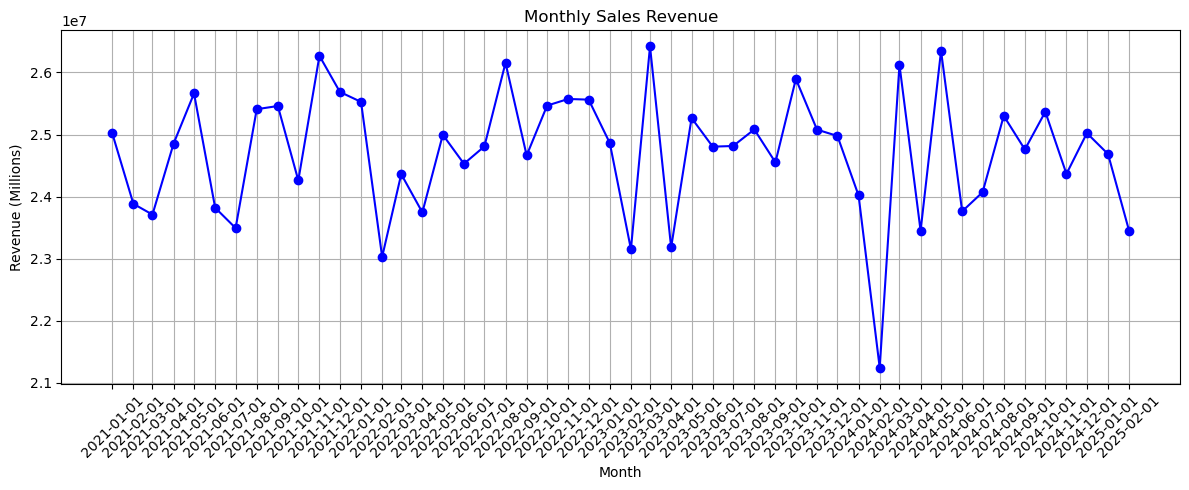

In [142]:
## updated code 
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'order_date' is datetime
df_SalesData['order_date'] = pd.to_datetime(df_SalesData['order_date'])

# Create 'order_month'
df_SalesData['order_month'] = df_SalesData['order_date'].dt.to_period('M')

# Group by order_month
monthly_sales = df_SalesData.groupby('order_month')['revenue'].sum()

# Convert PeriodIndex to timestamp
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot with all months shown on X-axis
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (Millions)')

# Show every month on the X-axis
plt.xticks(monthly_sales.index, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


In [143]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   channel            64104 non-null  object        
 3   customer_name      64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   unit_cost          64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  county             64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  lon   

In [144]:
## made a backup dataframe 
df_demo = df_SalesData.copy()

In [145]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   channel            64104 non-null  object        
 3   customer_name      64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   unit_cost          64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  county             64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  lon   

In [146]:
df_demo.to_csv('demo.csv')

In [147]:
## we can notice a significant drop in sales around 2024-01-01, 
## compared to the stable range of 2.3M to 2.6M. 
## Let's perform an EDA (Exploratory Data Analysis) step by step to solve this. 
## steps to take 
## 1. Detect and confirm the anomaly (outlier).
# 2. Find related details (products, customers, region, etc.) for 2024-01-01 month.
# 3.Suggest business steps to prevent such drops in the future.

In [150]:
# 1: Identify the month with lowest sales
lowest_month = monthly_sales.idxmin()
lowest_value = monthly_sales.min()
print(f"Lowest Revenue Month: {lowest_month}, Revenue: {lowest_value:.2f}")

Lowest Revenue Month: 2024-02-01 00:00:00, Revenue: 21241586.20


In [ ]:
## Lowest_Revenue_Month
df_lowest_month.to_csv('Lowest_Month.csv')

In [74]:
## 3: Aggregate insights – Where is the drop coming from?
# Revenue by region
region_revenue = df_lowest_month.groupby('region')['revenue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", region_revenue)

Revenue by Region:
 region
county       149659.6
Northeast     37741.1
West          37627.2
Midwest       36376.0
Name: revenue, dtype: float64


In [75]:
# Revenue by product
product_revenue = df_lowest_month.groupby('product_name')['revenue'].sum().sort_values(ascending=False)
print("Revenue by Product:\n", product_revenue)

Revenue by Product:
 product_name
Product 1     103880.0
Product 4      43617.0
Product 25     37741.1
Product 24     37627.2
Product 12     16401.6
Product 15     11385.0
Product 2      10752.0
Name: revenue, dtype: float64


In [76]:
# Revenue by customer
customer_revenue = df_lowest_month.groupby('customer_name')['revenue'].sum().sort_values(ascending=False)
print("Revenue by Customer:\n", customer_revenue)

Revenue by Customer:
 customer_name
Army Group           78889.0
Ola Company          60018.6
Snapptags Ltd        37741.1
Cadillac Ltd         37627.2
Gigabox Group        24991.0
Intentaio Company    11385.0
Johnson Ltd          10752.0
Name: revenue, dtype: float64


In [77]:
# Revenue by channel
channel_revenue = df_lowest_month.groupby('channel')['revenue'].sum().sort_values(ascending=False)
print("Revenue by Channel:\n", channel_revenue)

Revenue by Channel:
 channel
wholesale    261403.9
Name: revenue, dtype: float64


In [78]:
# Compare with previous month
# Get the period of the lowest month (assuming lowest_month is df_lowest_month from earlier)
lowest_month = df_lowest_month['order_date'].dt.to_period('M').iloc[0]  # Extract the period (e.g., '2024-02')
previous_month = lowest_month - 1  # Subtract 1 month from the period
df_previous_month = df_demo[df_demo['order_date'].dt.to_period('M') == previous_month]

print("Previous Month Revenue:", df_previous_month['revenue'].sum())
print("Drop Amount:", df_previous_month['revenue'].sum() - df_lowest_month['revenue'].sum())

Previous Month Revenue: 0.0
Drop Amount: -261403.90000000002


In [79]:
df_lowest_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    8 non-null      object        
 1   order_date      8 non-null      datetime64[ns]
 2   channel         8 non-null      object        
 3   customer_name   8 non-null      object        
 4   product_name    8 non-null      object        
 5   order_quantity  8 non-null      int64         
 6   unit_price      8 non-null      float64       
 7   revenue         8 non-null      float64       
 8   unit_cost       8 non-null      float64       
 9   state_code      8 non-null      object        
 10  state_name      8 non-null      object        
 11  region          8 non-null      object        
 12  county          8 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 964.0+ bytes


In [152]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   channel            64104 non-null  object        
 3   customer_name      64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   unit_cost          64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  county             64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  lon   

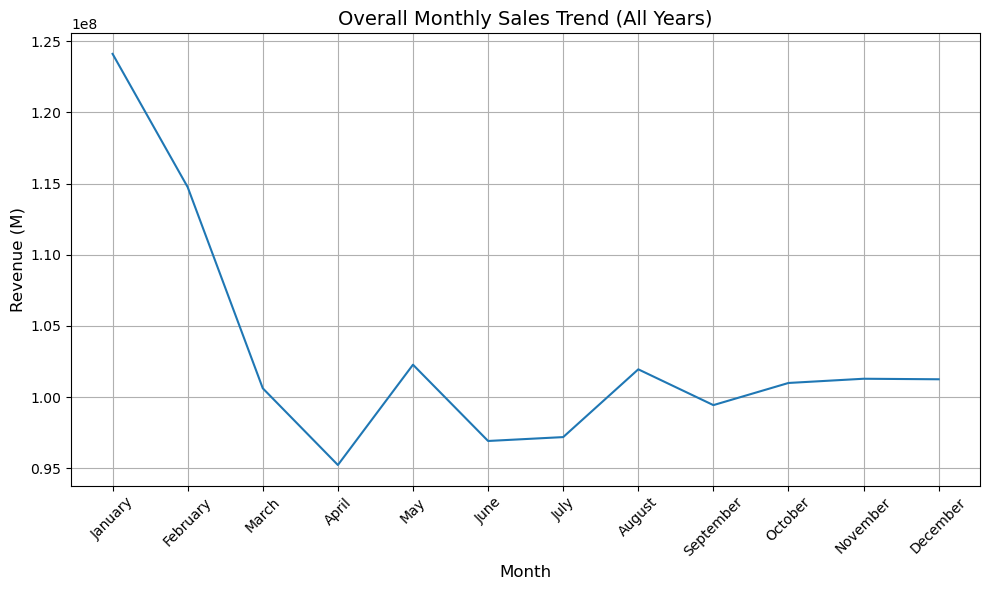

In [153]:
## overall monthly sales of all year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_SalesData is your DataFrame
df_SalesData['order_date'] = pd.to_datetime(df_SalesData['order_date'])

df_SalesData['month'] = df_SalesData['order_date'].dt.strftime('%B')

# Aggregate revenue by month across all years
monthly_trend = df_SalesData.groupby('month')['revenue'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', markers='o')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (M)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [154]:
##creating a monthly_sales trends
## first we have to remove the '2025-01' and '2025-02' beacuse it has only two months of that year
## we have to bring trends where all year data is located



In [171]:
df_SalesData['order_date'] = pd.to_datetime(df_SalesData['order_date'])

# Remove records from January and February 2018
df_NewSalesData = df_SalesData[~((df_SalesData['order_date'].dt.year == 2025) & (df_SalesData['order_date'].dt.month.isin([1, 2])))]

In [172]:
df_NewSalesData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61626 entries, 0 to 61625
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       61626 non-null  object        
 1   order_date         61626 non-null  datetime64[ns]
 2   channel            61626 non-null  object        
 3   customer_name      61626 non-null  object        
 4   product_name       61626 non-null  object        
 5   order_quantity     61626 non-null  int64         
 6   unit price         61626 non-null  float64       
 7   revenue            61626 non-null  float64       
 8   unit_cost          61626 non-null  float64       
 9   state_code         61626 non-null  object        
 10  state_name         61626 non-null  object        
 11  county             61626 non-null  object        
 12  region             61626 non-null  object        
 13  lat                61626 non-null  float64       
 14  lon        

In [173]:
df_NewSalesData.to_csv('NewSalesData.csv')

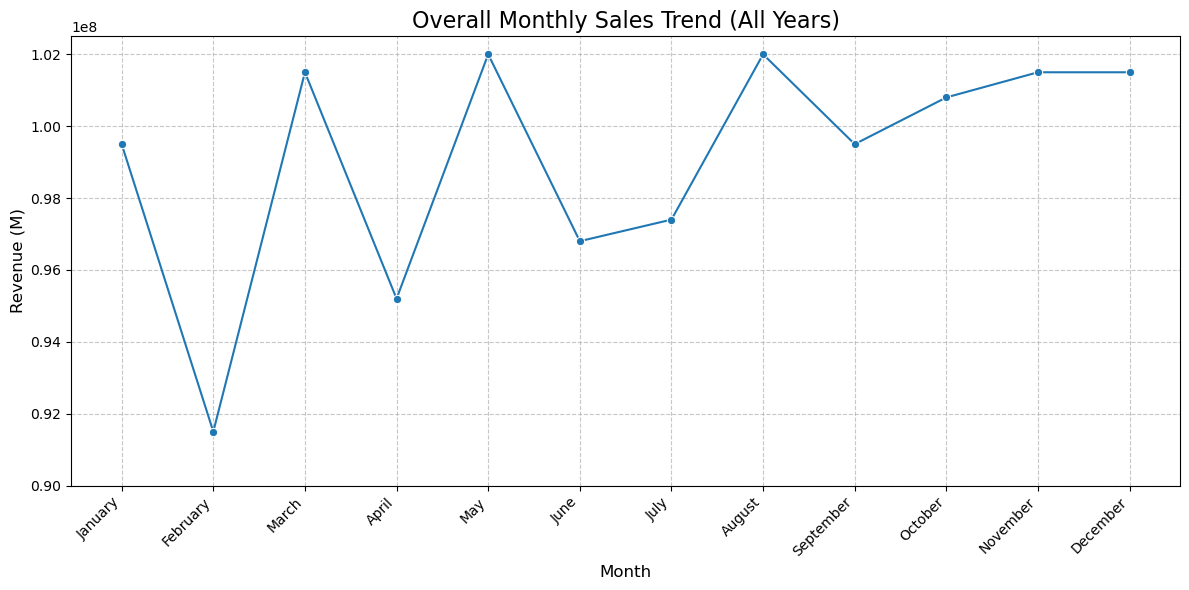

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a sample DataFrame that resembles the data in your image
# In a real scenario, you would load your data here (e.g., from CSV, database)
# df_NewSalesData = pd.read_csv('your_sales_data.csv')
# And then process it to get 'monthly_trend' as shown in previous examples.

# For demonstration, let's create the monthly_trend DataFrame directly from the image data
data = {
    'month': ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December'],
    'revenue': [99500000, 91500000, 101500000, 95200000, 102000000, 96800000,
                97400000, 102000000, 99500000, 100800000, 101500000, 101500000]
}
monthly_trend = pd.DataFrame(data)

# Ensure the 'month' column is a Categorical type with the correct order for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the ordered month (important for correct line plot)
monthly_trend = monthly_trend.sort_values('month')

# 2. Create the line chart
plt.figure(figsize=(12, 6)) # Adjusted figure size slightly for better readability

# Use sns.lineplot to create the trend line
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')

# Add title and labels
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (M)', fontsize=12)

# Set y-axis limits to match the image closely
# The image ranges roughly from 0.90e8 to 1.02e8
plt.ylim(90000000, 102500000) # Adjust these limits as needed for your actual data range

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines (dashed, light grey) as seen in the image
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust plot layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()

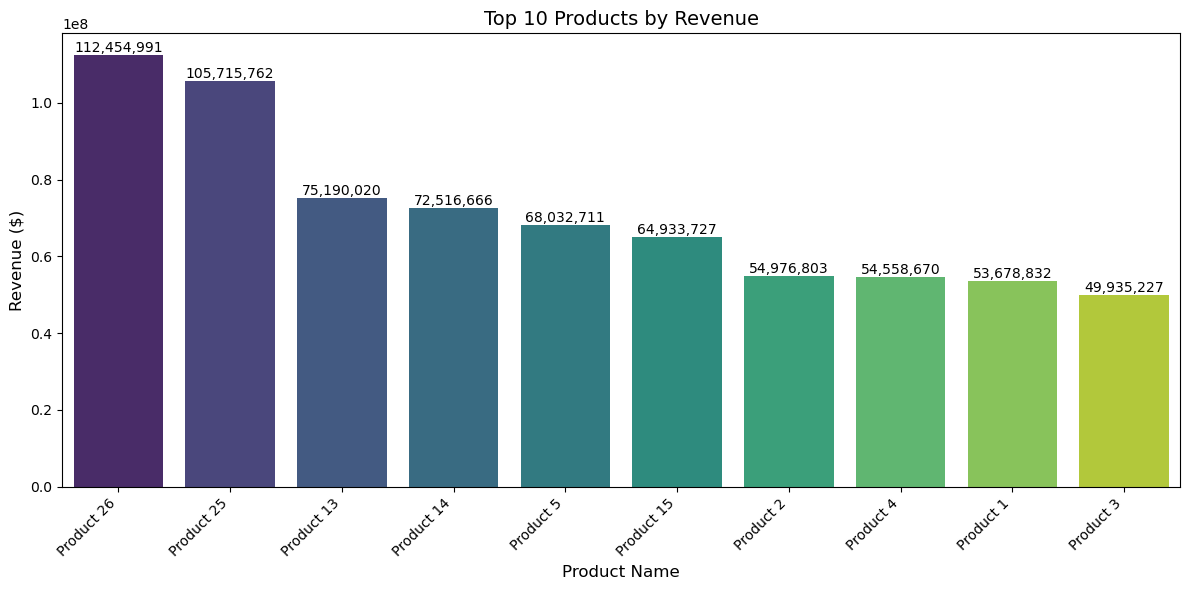

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name and sum the revenue, then sort in descending order and take top 10
top_10_products = df_NewSalesData.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
# Solved the FutureWarning by assigning 'x' to 'hue' and setting legend=False
bar_plot = sns.barplot(data=top_10_products, x='product_name', y='revenue', hue='product_name', palette='viridis', legend=False)

# Add labels on top of each bar
for i, v in enumerate(top_10_products['revenue']):
    bar_plot.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=10) # Using bar_plot.text for better placement

plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent label cutoff
plt.show()

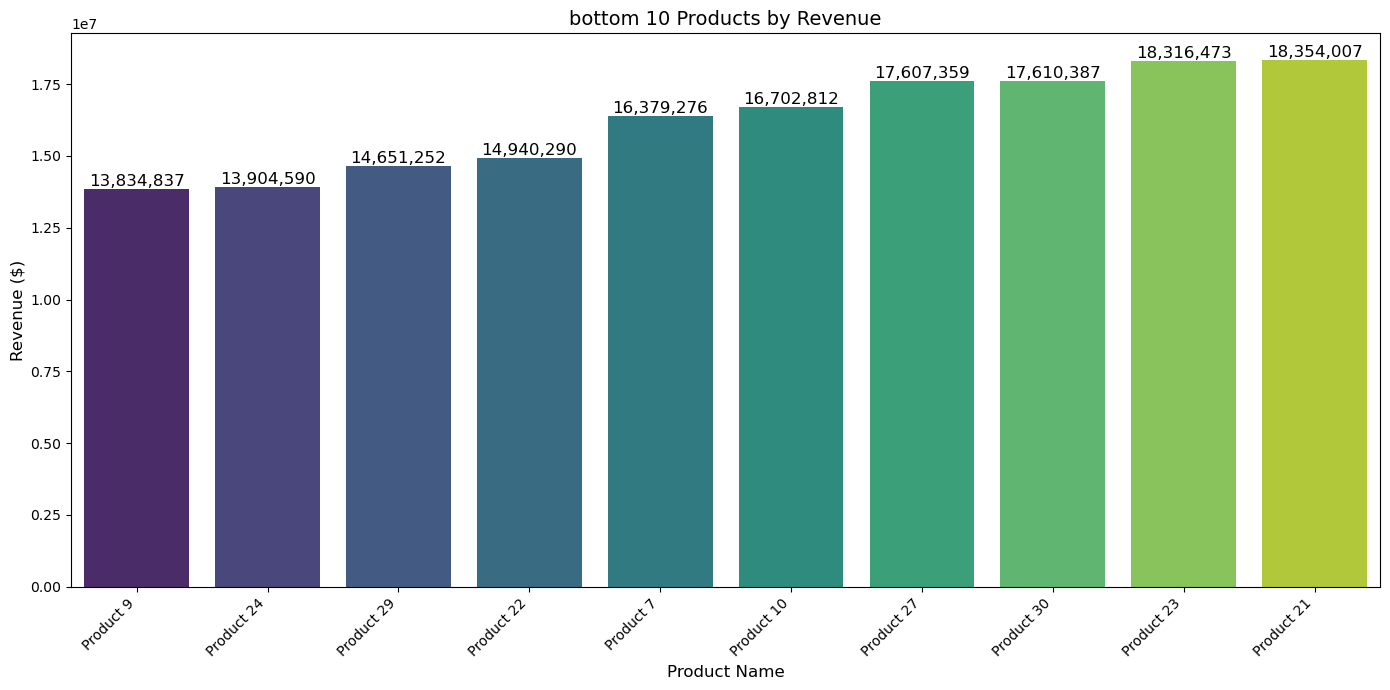

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name and sum the revenue, then sort in descending order and take top 10
bottom_10_products = df_NewSalesData.groupby('product_name')['revenue'].sum().sort_values(ascending=True).head(10).reset_index()

# Create the bar chart
plt.figure(figsize=(14, 7))
# Solved the FutureWarning by assigning 'x' to 'hue' and setting legend=False
bar_plot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', hue='product_name', palette='viridis', legend=False)

# Add labels on top of each bar
for i, v in enumerate(bottom_10_products['revenue']):
    bar_plot.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=12) # Using bar_plot.text for better placement

plt.title('bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent label cutoff
plt.show()

In [184]:
df_NewSalesData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61626 entries, 0 to 61625
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       61626 non-null  object        
 1   order_date         61626 non-null  datetime64[ns]
 2   channel            61626 non-null  object        
 3   customer_name      61626 non-null  object        
 4   product_name       61626 non-null  object        
 5   order_quantity     61626 non-null  int64         
 6   unit price         61626 non-null  float64       
 7   revenue            61626 non-null  float64       
 8   unit_cost          61626 non-null  float64       
 9   state_code         61626 non-null  object        
 10  state_name         61626 non-null  object        
 11  county             61626 non-null  object        
 12  region             61626 non-null  object        
 13  lat                61626 non-null  float64       
 14  lon        

In [186]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   channel            64104 non-null  object        
 3   customer_name      64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   unit_cost          64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  county             64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  lon   

In [188]:
import pandas as pd

# Assuming your DataFrame is named 'df_NewSalesData'.
# If you haven't loaded it yet, replace the dummy DataFrame below
# with your actual DataFrame loading code (e.g., pd.read_csv('your_file.csv')).

# --- Start of Dummy DataFrame for Demonstration (REMOVE IN YOUR ACTUAL CODE) ---
# This dummy DataFrame mimics the structure of your df_NewSalesData
# with 'revenue' and 'cost' columns as shown in your .info() output.
data = {
    'order_number': range(10),
    'revenue': [100.0, 150.0, 200.0, 50.0, 120.0, 180.0, 90.0, 210.0, 70.0, 130.0],
    'cost': [50.0, 70.0, 100.0, 25.0, 60.0, 90.0, 45.0, 105.0, 35.0, 65.0],
    'product_name': ['A', 'B', 'A', 'C', 'B', 'D', 'C', 'A', 'B', 'D']
}
df_NewSalesData = pd.DataFrame(data)
# --- End of Dummy DataFrame (REMOVE IN YOUR ACTUAL CODE) ---


# Calculate 'profit' first (Revenue - Cost)
df_NewSalesData['profit'] = df_NewSalesData['revenue'] - df_NewSalesData['cost']

# Calculate 'profit_margin'
# To avoid division by zero, we will use a small epsilon or fill with 0 where revenue is 0.
# A common practice is to replace 0 revenue with NaN or handle it based on business logic.
# Here, we'll replace 0 revenue with NaN before division to avoid errors,
# and then fill NaNs in profit_margin with 0 (or another appropriate value).

# Ensure 'revenue' and 'cost' are numeric types
df_NewSalesData['revenue'] = pd.to_numeric(df_NewSalesData['revenue'], errors='coerce')
df_NewSalesData['cost'] = pd.to_numeric(df_NewSalesData['cost'], errors='coerce')


# Calculate profit margin: (Revenue - Cost) / Revenue
# Handle cases where revenue might be zero to prevent division by zero errors.
# If revenue is 0, profit margin is undefined, so we'll set it to 0 or NaN.
df_NewSalesData['profit_margin'] = (
    df_NewSalesData['revenue'] - df_NewSalesData['cost']
) / df_NewSalesData['revenue']

# Handle cases where 'revenue' was 0, resulting in NaN for 'profit_margin'.
# We can choose to fill these NaNs with 0, or leave them as NaN.
# Filling with 0 makes sense if a product with no revenue effectively has no margin.
df_NewSalesData['profit_margin'] = df_NewSalesData['profit_margin'].fillna(0)

# Display the first few rows with the new 'profit' and 'profit_margin' columns
print("DataFrame after calculating profit and profit_margin:")
print(df_NewSalesData.head())

# Optional: Display info again to see the new columns and their dtypes
print("\nDataFrame Info after adding profit_margin:")
df_NewSalesData.info()

DataFrame after calculating profit and profit_margin:
   order_number  revenue   cost product_name  profit  profit_margin
0             0    100.0   50.0            A    50.0       0.500000
1             1    150.0   70.0            B    80.0       0.533333
2             2    200.0  100.0            A   100.0       0.500000
3             3     50.0   25.0            C    25.0       0.500000
4             4    120.0   60.0            B    60.0       0.500000

DataFrame Info after adding profit_margin:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_number   10 non-null     int64  
 1   revenue        10 non-null     float64
 2   cost           10 non-null     float64
 3   product_name   10 non-null     object 
 4   profit         10 non-null     float64
 5   profit_margin  10 non-null     float64
dtypes: float64(4), int64(1), object(1)
m

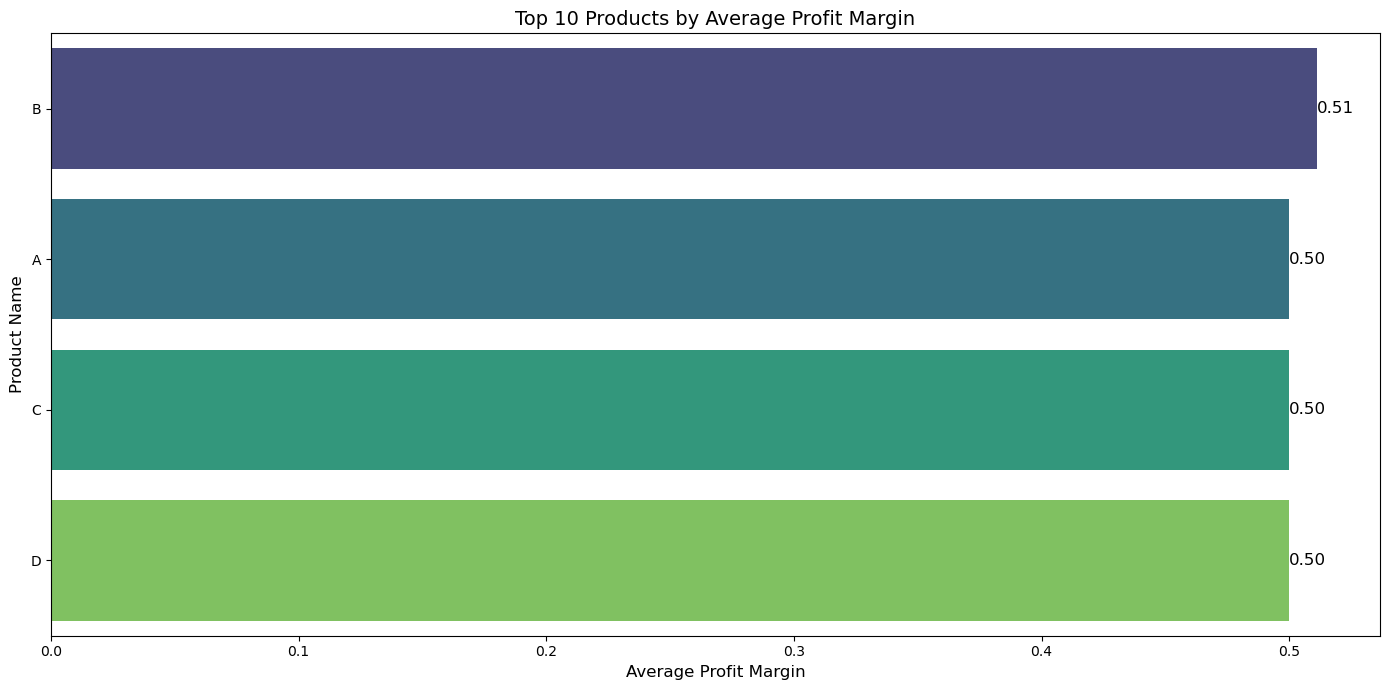

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name, calculate the mean profit margin, sort in descending order, and take top 10
top_10_profit_margin = df_NewSalesData.groupby('product_name')['profit_margin'].mean().sort_values(ascending=False).head(10).reset_index()

# Create the horizontal bar chart
plt.figure(figsize=(14, 7))
# Use seaborn's barplot with horizontal orientation, assign y to hue, and set legend=False
bar_plot = sns.barplot(data=top_10_profit_margin, y='product_name', x='profit_margin', hue='product_name', palette='viridis', legend=False)

# Add labels on the right of each bar
for i, v in enumerate(top_10_profit_margin['profit_margin']):
    bar_plot.text(v, i, f'{v:.2f}', ha='left', va='center', fontsize=12)  # Format to 2 decimal places

plt.title('Top 10 Products by Average Profit Margin', fontsize=14)
plt.xlabel('Average Profit Margin', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

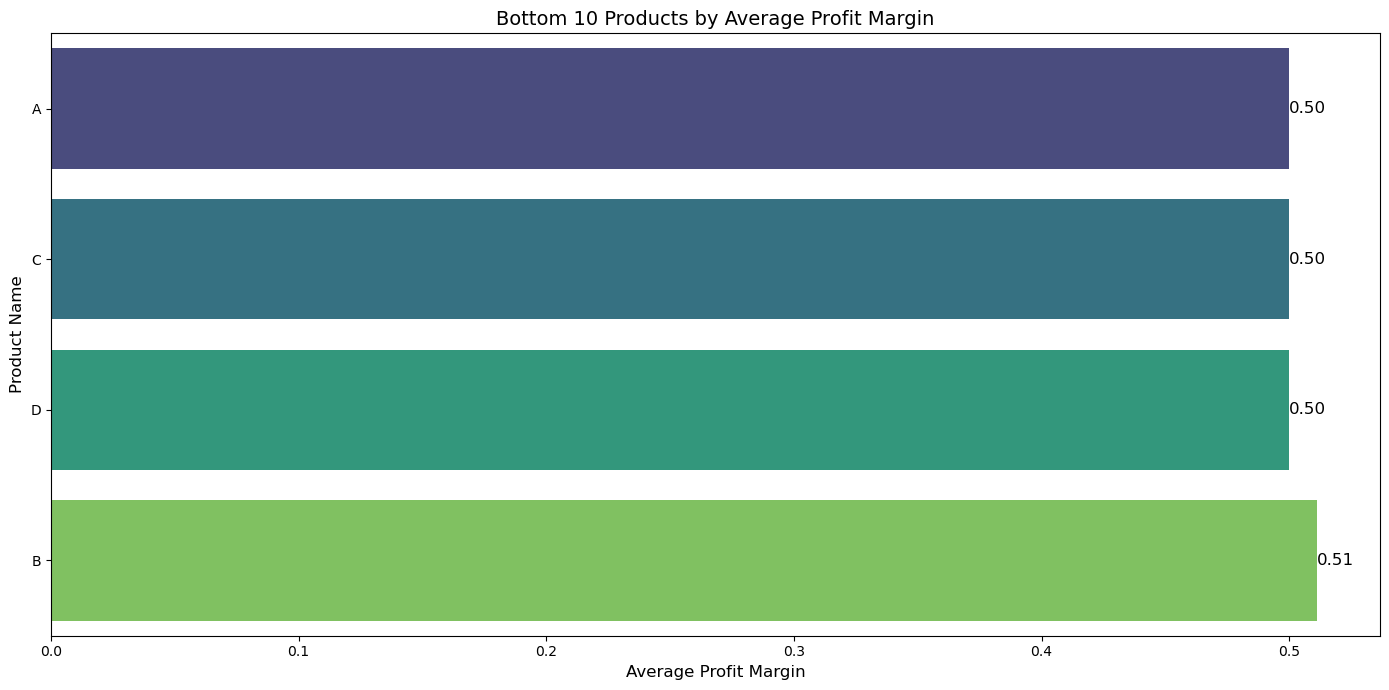

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name, calculate the mean profit margin, sort in ascending order, and take bottom 10
bottom_10_profit_margin = df_NewSalesData.groupby('product_name')['profit_margin'].mean().sort_values(ascending=True).head(10).reset_index()

# Create the horizontal bar chart
plt.figure(figsize=(14, 7))
# Use seaborn's barplot with horizontal orientation, assign y to hue, and set legend=False
bar_plot = sns.barplot(data=bottom_10_profit_margin, y='product_name', x='profit_margin', hue='product_name', palette='viridis', legend=False)

# Add labels on the right of each bar
for i, v in enumerate(bottom_10_profit_margin['profit_margin']):
    bar_plot.text(v, i, f'{v:.2f}', ha='left', va='center', fontsize=12)  # Format to 2 decimal places

plt.title('Bottom 10 Products by Average Profit Margin', fontsize=14)
plt.xlabel('Average Profit Margin', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

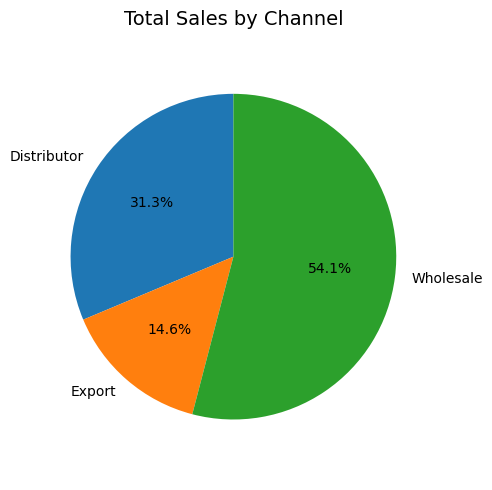

In [191]:
# Sales by channel 
import pandas as pd
import matplotlib.pyplot as plt

# Group by channel and sum the revenue
revenue_by_channel = df_SalesData.groupby('channel')['revenue'].sum().reset_index()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%', startangle=90)
plt.title('Total Sales by Channel', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

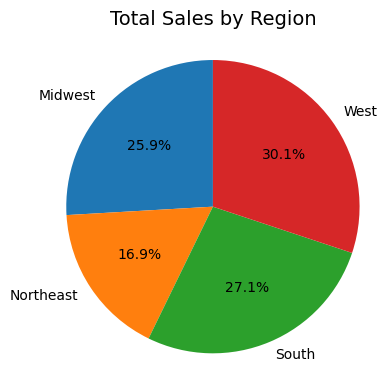

In [192]:
# Sales by region 
import pandas as pd
import matplotlib.pyplot as plt

# Group by region and sum the revenue
revenue_by_region = df_SalesData.groupby('region')['revenue'].sum().reset_index()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(revenue_by_region['revenue'], labels=revenue_by_region['region'], autopct='%1.1f%%', startangle=90)
plt.title('Total Sales by Region', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

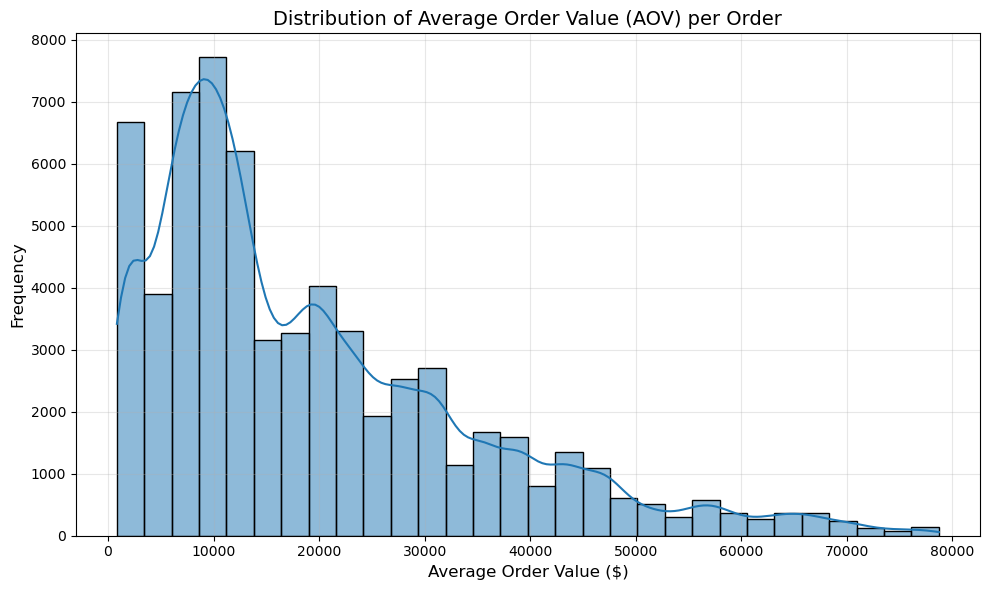

AOV Statistics:
count    64104.000000
mean     19280.682937
std      15429.602766
min        837.500000
25%       8019.900000
50%      14023.100000
75%      27416.400000
max      78711.600000
Name: aov_per_order, dtype: float64


In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate AOV per order 
# Since each row is an order, AOV per order is simply the revenue value
df_SalesData['aov_per_order'] = df_SalesData['revenue']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_SalesData, x='aov_per_order', bins=30, kde=True)
plt.title('Distribution of Average Order Value (AOV) per Order', fontsize=14)
plt.xlabel('Average Order Value ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)  # Add a light grid for readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Optional: Print basic statistics for reference
print("AOV Statistics:")
print(df_SalesData['aov_per_order'].describe())

In [200]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   channel            64104 non-null  object        
 3   customer_name      64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   unit_cost          64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  county             64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  lon   

In [201]:
print(df_SalesData.columns)

Index(['order_number', 'order_date', 'channel', 'customer_name',
       'product_name', 'order_quantity', 'unit price', 'revenue', 'unit_cost',
       'state_code', 'state_name', 'county', 'region', 'lat', 'lon', 'budgets',
       'cost', 'profit', 'profit_margin_pct', 'order_month', 'month',
       'aov_per_order'],
      dtype='object')


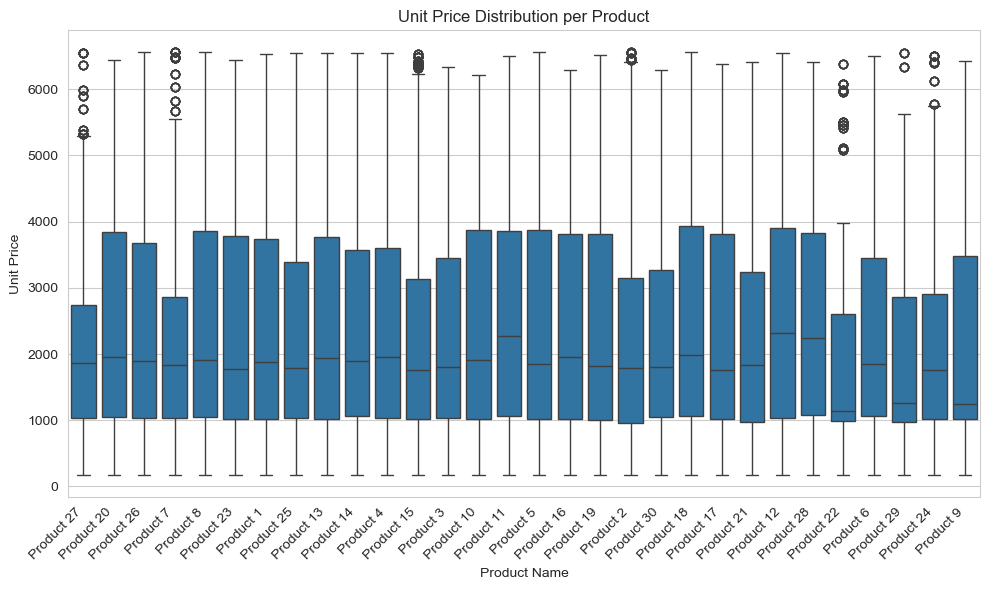

In [205]:
##Unit Price Distribution per Product
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Create a box plot for unit price distribution per product
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_name', y='unit price', data=df_SalesData)
plt.xticks(rotation=45, ha='right')
plt.title('Unit Price Distribution per Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.tight_layout()

# Show the plot
plt.show()

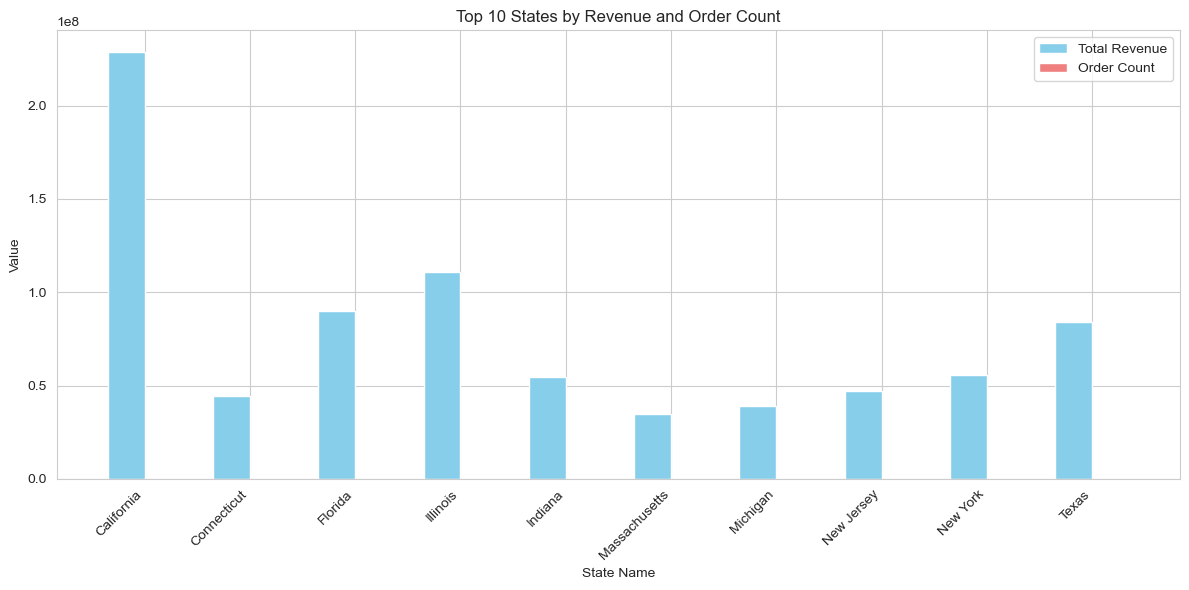

In [207]:
##Top 10 States by Revenue and Order Count
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by state_name and count orders, sum revenue
state_summary = df_SalesData.groupby('state_name').agg({'revenue': 'sum', 'order_number': 'count'}).reset_index()
state_summary.columns = ['state_name', 'total_revenue', 'order_count']

# Get top 10 states by total revenue
top_states = state_summary.nlargest(10, 'total_revenue')['state_name']

# Filter data for top 10 states
top_state_data = state_summary[state_summary['state_name'].isin(top_states)]

# Create a bar plot for revenue and order count
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(top_state_data))

plt.bar(index, top_state_data['total_revenue'], bar_width, label='Total Revenue', color='skyblue')
plt.bar([i + bar_width for i in index], top_state_data['order_count'], bar_width, label='Order Count', color='lightcoral')

plt.xlabel('State Name')
plt.ylabel('Value')
plt.title('Top 10 States by Revenue and Order Count')
plt.xticks([i + bar_width/2 for i in index], top_state_data['state_name'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

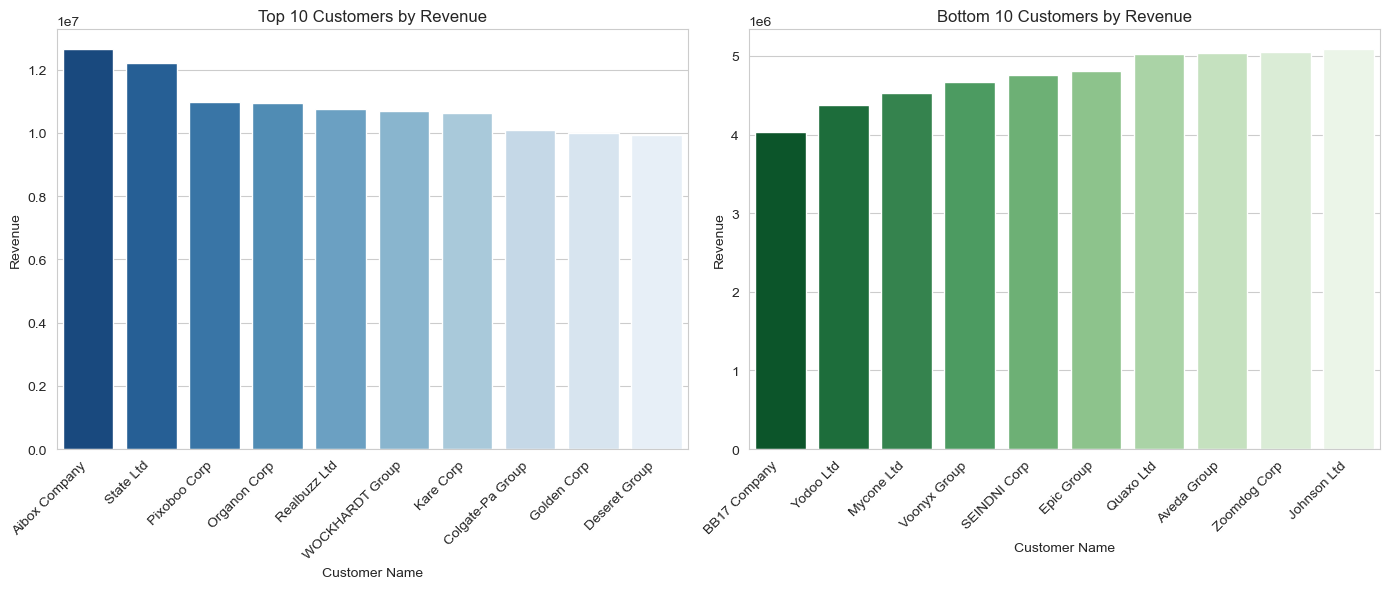

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by customer_name and sum revenue
customer_revenue = df_SalesData.groupby('customer_name')['revenue'].sum().reset_index()

# Get top 10 and bottom 10 customers by revenue
top_customers = customer_revenue.nlargest(10, 'revenue')
bottom_customers = customer_revenue.nsmallest(10, 'revenue')

# Create figure with two subplots
plt.figure(figsize=(14, 6))

# Top 10 customers plot
plt.subplot(1, 2, 1)
sns.barplot(data=top_customers, x='customer_name', y='revenue', hue='customer_name', palette='Blues_r', legend=False)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Bottom 10 customers plot
plt.subplot(1, 2, 2)
sns.barplot(data=bottom_customers, x='customer_name', y='revenue', hue='customer_name', palette='Greens_r', legend=False)
plt.title('Bottom 10 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [219]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   channel            64104 non-null  object        
 3   customer_name      64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   unit_cost          64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  county             64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  lon   

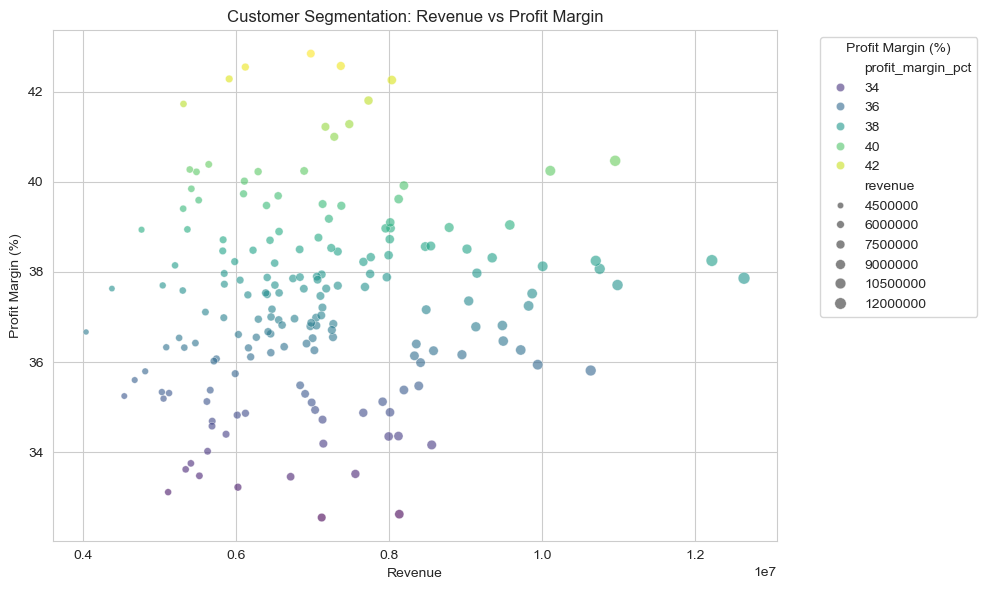

In [220]:
##customer segmantation: revenue vs profit margin
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by customer_name and calculate average profit_margin_pct and sum of revenue
customer_segment = df_SalesData.groupby('customer_name').agg({'revenue': 'sum', 'profit_margin_pct': 'mean'}).reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_segment, x='revenue', y='profit_margin_pct', size='revenue', hue='profit_margin_pct', palette='viridis', alpha=0.6)
plt.title('Customer Segmentation: Revenue vs Profit Margin')
plt.xlabel('Revenue')
plt.ylabel('Profit Margin (%)')
plt.legend(title='Profit Margin (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

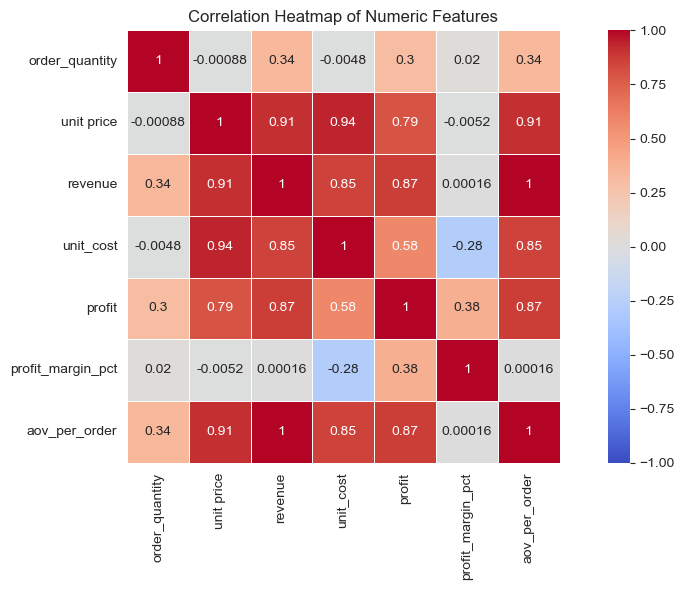

In [224]:
## Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select numeric columns for correlation
numeric_columns = ['order_quantity', 'unit price', 'revenue', 'unit_cost', 'profit', 'profit_margin_pct', 'aov_per_order']
correlation_matrix = df_SalesData[numeric_columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()

# Show the plot
plt.show()


In [223]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   channel            64104 non-null  object        
 3   customer_name      64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   unit_cost          64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  county             64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  lon   

In [1]:
df_SalesData.to_csv('SalesData.csv')

NameError: name 'df_SalesData' is not defined